In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter

In [2]:

df = pd.read_csv('../../efs/original-data/meta_all_valid.csv')

In [3]:
df.head()

,unique_id,globus_id,descr,name,gender,source_color,color,url,features,season,hierarchy_full,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5,hierarchy_6,href,prod_id
0,59462ba8-4712-409d-af94-002f65271f88,1751581,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"['goldfarbenedetails', 'reisverschluss', 'kuns...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
1,afd9c2d9-2abc-4ed8-a8a0-715b3ab3c2cb,1751582,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"['goldfarbenedetails', 'reisverschluss', 'kuns...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
2,7aaa3d6d-ffdf-4715-a0b7-92945c0e05a3,1751580,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"['goldfarbenedetails', 'reisverschluss', 'kuns...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
3,b6e71841-4442-4c15-8e76-e8d64272888e,1726060,handtasche,GUESS,damen,schwarz,schwarz,https://apitest.censhare.globus.ch/image/17260...,"['reisverschluss', 'kunstleder', 'unifarben', ...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536800739
4,cd040353-3c8e-47de-91b5-e16a5e26cd42,1726061,handtasche,GUESS,damen,schwarz,schwarz,https://apitest.censhare.globus.ch/image/17260...,"['reisverschluss', 'kunstleder', 'unifarben', ...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536800739


In [4]:
df.shape

(277386, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277386 entries, 0 to 277385
Data columns (total 19 columns):
unique_id         277386 non-null object
globus_id         277386 non-null int64
descr             277386 non-null object
name              277033 non-null object
gender            195955 non-null object
source_color      266877 non-null object
color             265871 non-null object
url               277386 non-null object
features          277386 non-null object
season            277386 non-null object
hierarchy_full    277386 non-null object
hierarchy_1       277386 non-null object
hierarchy_2       251163 non-null object
hierarchy_3       55551 non-null object
hierarchy_4       0 non-null float64
hierarchy_5       0 non-null float64
hierarchy_6       0 non-null float64
href              277386 non-null object
prod_id           277354 non-null object
dtypes: float64(3), int64(1), object(15)
memory usage: 40.2+ MB


## Categories

In [6]:
df['descr'].unique()

array(['handtasche', 'umhangetasche', 'clutch', 'rucksack',
       'gurteltasche', 'schultertasche', 'shopper', 'taschemitnecessaire',
       'portemonnaie', 'tuch', 'strickpullover', 'jeansslimfit', 'bluse',
       'accessoire', 'becher', 'duftkerze', 'raumduft', 'others',
       'kuchentuch', 'kuchenschurze', 'sitftesets', 'shorts', 'tshirt',
       'top', 'blusentop', 'kleid', 'overall', 'maxikleid',
       'bleistiftrock', 'schlupfbluse', 'stoffhose', '34armshirt',
       'wickelbluse', 'faltenrock', 'langarmshirt', 'sweatshirt',
       'wollmantel', 'wintermantel', 'businessmantel', 'übergangsmantel',
       'winterjacke', 'shirt', 'leggins', 'accessoires',
       'partydekoration', 'partyaccessoires', 'etui', 'hose', 'sweathose',
       'leichtejacke', 'krabbelschuhe', 'jupe', 'strickjacke',
       'warmeflasche', 'notizblocke', 'notizbuecher', 'hangeleuchte',
       'zierkissenbezug', 'bettuberwurf', 'laterne', 'wohnaccessoire',
       'velozubehoer', 'haken', 'servietten', 'tis

In [7]:
df['descr'].nunique()

925

In [8]:
df['descr'].value_counts()

others              34220
tshirt              10584
strickpullover       8908
kleid                6321
hemdslimfit          5366
                    ...  
bartpflege              1
bademutze               1
PLAYMOBILPirates        1
spiegel                 1
probierloffel           1
Name: descr, Length: 925, dtype: int64

In [9]:
df['hierarchy_2'].unique()

array(['taschen', 'portemonnaie', 'schals', 'pullover-strick', 'jeans',
       'blusen-tuniken', 'papeterie', 'tisch', 'wohnen', 'kuche',
       'shorts-bermudas', 'top-shirts-sweats', 'kleider', 'overalls',
       'jupe', 'hosen', 'shirts-tops-sweats', 'mantel', 'jacken',
       'oberteile', 'unterteile', 'taschen-accessoire', 'kleider-sets',
       'schuhe', 'bad', 'bett', 'outdoor', 'ordnung-aufbewahrung',
       'blazer', 'lederjacken-mantel', 'vestons', 'anzuge', 'hemden',
       'krawatten-fliegen-pochetten', 'gurtel', 'tagwasche', 'shapewear',
       'wasche-pyjamas', 'poncho-cape', 'strumpfmode',
       'lederjacken-ledermantel', 'westen-gilets', 'kopfbedeckungen',
       'sonnenbrillen', 'haar', 'uhren', nan, 'loungewearyoga',
       'elektronik-gadget', 'regenschirme', 'accessoires', 'socken',
       'schmuck', 'gewurze', 'spielwarendiverses', 'reisegepack',
       'spielwarentierefiguren', 'nachtwasche', 'wasche', 'weihnachten',
       'spielwarenpuppenwelt', 'handschuhe', '

In [10]:
df['hierarchy_3'].unique()

array([nan, 'buro', 'glaser-karaffen', 'raumduft', 'karten-verpackung',
       'kuchentextilien', 'zeichnen-malen', 'partygeschirr',
       'badaccessoire', 'notizbucher', 'lampen', 'wohntextilien',
       'bettuberwurf', 'kerzenhalter', 'dekoaccessoire', 'velo',
       'kleideraufbewahrung', 'tischtextil', 'backen', 'pflegeprodukte',
       'geschirr', 'servieren', 'schalen-schusseln', 'wein-baraccessoire',
       'duvet', 'tee-kaffee', 'karten', 'badtextil', 'bademantel-slipper',
       'kuchenmesser', 'kuchenhelfer', 'bettwasche', 'zubehor',
       'kuchenmaschinen', 'kuchenaufbewahrung', 'wurzenverfeinern',
       'fondue-raclette', 'kochtopfe-pfannen', 'papierservietten',
       'rustenvorbereiten', 'kissen', 'korbe-boxen', 'radio',
       'tischaccessoires', 'trink-isolierflaschen', 'salze', 'gewurze',
       'vasen-toepfe', 'fixleintuch', 'besteck', 'koffer-taschen',
       'kerzen', 'reinigungsutensilien', 'agenden', 'kochbesteck',
       'schreibgerate', 'taschen', 'wecker', '

## Features selection (Removal of the rare features (<1000 occurance))

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df['features'] = df['features'].apply(literal_eval)

In [13]:
list_of_features=np.concatenate(df.features)

In [15]:
len(list_of_features)

2067290

In [29]:
Counter(list_of_features).most_common()

[('unifarben', 106611),
 ('CO', 94520),
 ('gemustertodermitdruck', 61660),
 ('langarm', 61128),
 ('weichergriff', 51752),
 ('EL', 47901),
 ('kunstmischgewebe', 44593),
 ('mittelschwerequalitaet', 44520),
 ('100baumwolle', 43589),
 ('rundhalsausschnitt', 41628),
 ('PES', 39820),
 ('reisverschluss', 35734),
 ('leichtequalitaet', 29061),
 ('echtesleder', 27952),
 ('PA', 27233),
 ('casual', 24649),
 ('CV', 22641),
 ('kurzarm', 21794),
 ('grafischemmuster', 21360),
 ('mischgewebemitelasthan', 21308),
 ('ausjersey', 20704),
 ('L18', 16891),
 ('normalelange', 16594),
 ('knopfe', 16218),
 ('naturfasermitelasthan', 16147),
 ('gewebemitflacheroptik', 15860),
 ('leistentaschen', 14368),
 ('normalebundhohe', 13793),
 ('gummi', 13010),
 ('pullover', 11668),
 ('inmidirocklange', 11614),
 ('naturfasermischgewebe', 11404),
 ('runderschuhspitze', 11330),
 ('aufdruck', 11054),
 ('organischemmuster', 11027),
 ('streifenmuster', 10841),
 ('vausschnitt', 10812),
 ('leder', 10493),
 ('WO', 10319),
 ('strick

In [30]:
list_tuples=Counter(list_of_features).most_common()

In [31]:
non_rare=[x[0] for x in list_tuples if x[1] > 1000]

In [32]:
non_rare

['unifarben',
 'CO',
 'gemustertodermitdruck',
 'langarm',
 'weichergriff',
 'EL',
 'kunstmischgewebe',
 'mittelschwerequalitaet',
 '100baumwolle',
 'rundhalsausschnitt',
 'PES',
 'reisverschluss',
 'leichtequalitaet',
 'echtesleder',
 'PA',
 'casual',
 'CV',
 'kurzarm',
 'grafischemmuster',
 'mischgewebemitelasthan',
 'ausjersey',
 'L18',
 'normalelange',
 'knopfe',
 'naturfasermitelasthan',
 'gewebemitflacheroptik',
 'leistentaschen',
 'normalebundhohe',
 'gummi',
 'pullover',
 'inmidirocklange',
 'naturfasermischgewebe',
 'runderschuhspitze',
 'aufdruck',
 'organischemmuster',
 'streifenmuster',
 'vausschnitt',
 'leder',
 'WO',
 'strick',
 'Warmequalitaet',
 'freizeit',
 'stehkragen',
 'tshirts',
 'SE',
 'popelinegewebeflacheroptik',
 'weihnachten',
 'L1',
 'festergriff',
 'fachmitreissverschluss',
 'business',
 'fliessend',
 'papier',
 'schmalzulaufendgeschnittenesbein',
 'bis3cmabsatzhohe',
 'CAC',
 'druckknopfe',
 'kunststoff',
 'ohnearm',
 'feineschiffongewebe',
 'LI',
 'blusenk

In [33]:
df_common_feat=df.features.apply(lambda x: list(set(x).intersection(non_rare)))

In [34]:
df_common_feat.head()

0    [unifarben, kunstleder, reisverschluss, goldfa...
1    [unifarben, kunstleder, reisverschluss, goldfa...
2    [unifarben, kunstleder, reisverschluss, goldfa...
3    [unifarben, kunstleder, reisverschluss, handta...
4    [unifarben, kunstleder, reisverschluss, handta...
Name: features, dtype: object

In [35]:
len(df_common_feat[0])

6

In [36]:
len(df.features[0])

7

In [37]:
df.features=df_common_feat

In [38]:
list_of_features=np.concatenate(df.features)

In [39]:
Counter(list_of_features).most_common()

[('unifarben', 106611),
 ('CO', 94520),
 ('gemustertodermitdruck', 61660),
 ('langarm', 61128),
 ('weichergriff', 51752),
 ('EL', 47901),
 ('kunstmischgewebe', 44593),
 ('mittelschwerequalitaet', 44520),
 ('100baumwolle', 43589),
 ('rundhalsausschnitt', 41628),
 ('PES', 39820),
 ('reisverschluss', 35734),
 ('leichtequalitaet', 29061),
 ('echtesleder', 27952),
 ('PA', 27233),
 ('casual', 24649),
 ('CV', 22641),
 ('kurzarm', 21794),
 ('grafischemmuster', 21360),
 ('mischgewebemitelasthan', 21308),
 ('ausjersey', 20704),
 ('L18', 16891),
 ('normalelange', 16594),
 ('knopfe', 16218),
 ('naturfasermitelasthan', 16147),
 ('gewebemitflacheroptik', 15860),
 ('leistentaschen', 14368),
 ('normalebundhohe', 13793),
 ('gummi', 13010),
 ('pullover', 11668),
 ('inmidirocklange', 11614),
 ('naturfasermischgewebe', 11404),
 ('runderschuhspitze', 11330),
 ('aufdruck', 11054),
 ('organischemmuster', 11027),
 ('streifenmuster', 10841),
 ('vausschnitt', 10812),
 ('leder', 10493),
 ('WO', 10319),
 ('strick

In [40]:
len(Counter(list_of_features).most_common())

268

## Category selection

In [41]:
df.shape

(277386, 19)

In [42]:
cat = ['taschen', 'schuhe', 'pullover-strick', 'top-shirts-sweats',
       'schals', 'hemden', 'hosen', 'oberteile', 'blusen-tuniken',
       'shirts-tops-sweats', 'kleider']


In [43]:
df2 = df[df.hierarchy_2.isin(cat)]

In [44]:
df2.shape

(115267, 19)

In [45]:
df2.head(3)

,unique_id,globus_id,descr,name,gender,source_color,color,url,features,season,hierarchy_full,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5,hierarchy_6,href,prod_id
0,59462ba8-4712-409d-af94-002f65271f88,1751581,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[unifarben, kunstleder, reisverschluss, goldfa...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
1,afd9c2d9-2abc-4ed8-a8a0-715b3ab3c2cb,1751582,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[unifarben, kunstleder, reisverschluss, goldfa...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
2,7aaa3d6d-ffdf-4715-a0b7-92945c0e05a3,1751580,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[unifarben, kunstleder, reisverschluss, goldfa...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801


## Frequency on hierarchy 2/3 level

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115267 entries, 0 to 277385
Data columns (total 19 columns):
unique_id         115267 non-null object
globus_id         115267 non-null int64
descr             115267 non-null object
name              115027 non-null object
gender            115267 non-null object
source_color      115240 non-null object
color             114890 non-null object
url               115267 non-null object
features          115267 non-null object
season            115267 non-null object
hierarchy_full    115267 non-null object
hierarchy_1       115267 non-null object
hierarchy_2       115267 non-null object
hierarchy_3       0 non-null object
hierarchy_4       0 non-null float64
hierarchy_5       0 non-null float64
hierarchy_6       0 non-null float64
href              115267 non-null object
prod_id           115267 non-null object
dtypes: float64(3), int64(1), object(15)
memory usage: 17.6+ MB


### There are no fashion items with hierarchy 3 details

In [47]:
df2['hierarchy_2'].value_counts()

schuhe                15956
taschen               15371
pullover-strick       15186
top-shirts-sweats     11606
hemden                10931
blusen-tuniken         9141
hosen                  9096
kleider                8804
shirts-tops-sweats     8732
oberteile              5460
schals                 4984
Name: hierarchy_2, dtype: int64

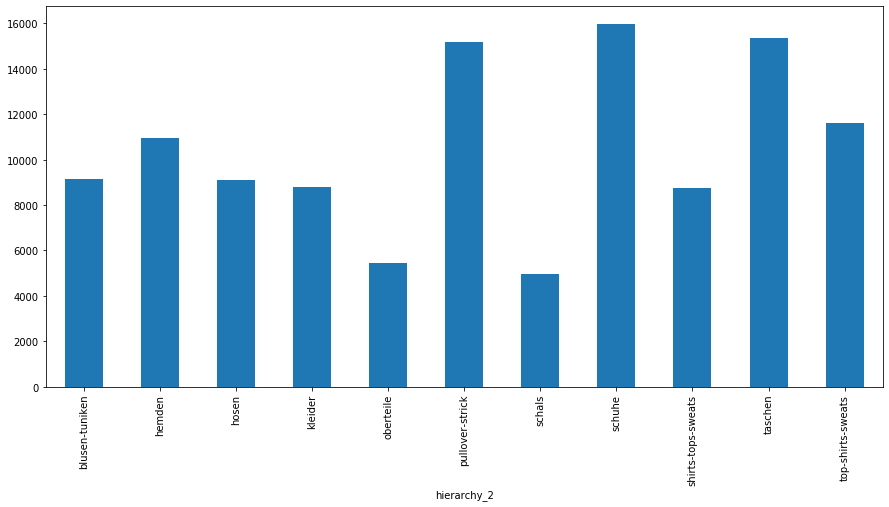

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
df2.groupby('hierarchy_2')['globus_id'].count().plot.bar(ax=ax)


In [49]:
df2.groupby('hierarchy_2')['prod_id'].nunique().sort_values(ascending=False)

hierarchy_2
taschen               6587
schuhe                4174
pullover-strick       3902
top-shirts-sweats     2995
schals                2551
hemden                2416
hosen                 2343
oberteile             2312
blusen-tuniken        2290
shirts-tops-sweats    2223
kleider               2204
Name: prod_id, dtype: int64

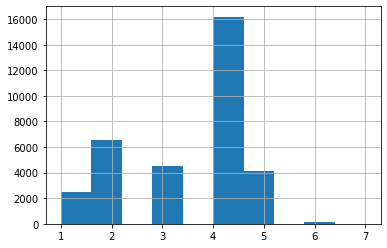

In [50]:
df2.groupby('prod_id').count().globus_id.hist()

## Category with the most nr. of images: Shoes

In [51]:
shoes=df2[df2['hierarchy_2']=='schuhe']

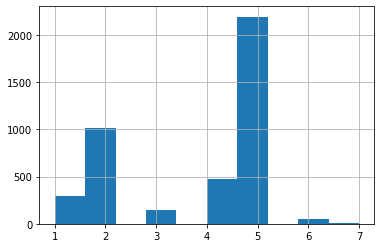

In [52]:
shoes.groupby('prod_id').count().globus_id.hist()

In [53]:
shoes.reset_index(drop=True, inplace=True)

In [54]:
list_of_features_shoes=np.concatenate(shoes.features)
Counter(list_of_features_shoes).most_common()

[('gummi', 12611),
 ('echtesleder', 11576),
 ('runderschuhspitze', 11330),
 ('leder', 10368),
 ('L18', 10353),
 ('bis3cmabsatzhohe', 7390),
 ('zumschlupfen', 6524),
 ('flach', 6286),
 ('zumschnuren', 5999),
 ('blockabsatz', 5782),
 ('pim-textil', 4994),
 ('sneakers', 4133),
 ('stiefelstiefeletten', 3398),
 ('Sneakertief', 3293),
 ('casual', 2912),
 ('von3cm6cmabsatzhohe', 2373),
 ('textil', 2347),
 ('uber6cmabsatzhohe', 2133),
 ('reissverschluss', 2113),
 ('spitzeschuhspitze', 2065),
 ('halbschuhe', 1993),
 ('offeneschuhspitze', 1961),
 ('sandalensandaletten', 1824),
 ('velours', 1713),
 ('plateauabsatz', 1620),
 ('kunstmischgewebe', 1267),
 ('ledergummi', 1158),
 ('schnurschuh', 1017),
 ('glitzerapplikationen', 1017),
 ('pumpshighheels', 1005),
 ('L1', 609),
 ('goldfarbenedetails', 593),
 ('silberfarbenedetails', 522),
 ('business', 364),
 ('mitfakefurdetails', 289),
 ('fransen', 214),
 ('kunstleder', 214),
 ('MitApplikationen', 80),
 ('CO', 79),
 ('abend', 77),
 ('WO', 75),
 ('PES', 

In [55]:
len(Counter(list_of_features_shoes).most_common())

55

In [56]:
labels=np.concatenate(shoes.features)

In [57]:
labels=set(labels)

In [58]:
labels

{'100baumwolle',
 '100merinowolle',
 '100wolle',
 'CO',
 'L1',
 'L18',
 'L2',
 'MER',
 'MitApplikationen',
 'PA',
 'PAN',
 'PES',
 'PU',
 'Sneakertief',
 'WO',
 'abend',
 'anhaenger',
 'bis3cmabsatzhohe',
 'blockabsatz',
 'business',
 'casual',
 'echtesleder',
 'flach',
 'fransen',
 'glitzerapplikationen',
 'goldfarbenedetails',
 'gummi',
 'halbschuhe',
 'karton',
 'kunstleder',
 'kunstmischgewebe',
 'leder',
 'ledergummi',
 'mischgewebemitelasthan',
 'mitfakefurdetails',
 'naturfasermischgewebe',
 'offeneschuhspitze',
 'pim-kunststoff',
 'pim-textil',
 'plateauabsatz',
 'pumpshighheels',
 'reissverschluss',
 'runderschuhspitze',
 'sandalensandaletten',
 'schnurschuh',
 'silberfarbenedetails',
 'sneakers',
 'spitzeschuhspitze',
 'stiefelstiefeletten',
 'textil',
 'uber6cmabsatzhohe',
 'velours',
 'von3cm6cmabsatzhohe',
 'zumschlupfen',
 'zumschnuren'}

## Category: All 

In [59]:
Counter(list_of_features).most_common()

[('unifarben', 106611),
 ('CO', 94520),
 ('gemustertodermitdruck', 61660),
 ('langarm', 61128),
 ('weichergriff', 51752),
 ('EL', 47901),
 ('kunstmischgewebe', 44593),
 ('mittelschwerequalitaet', 44520),
 ('100baumwolle', 43589),
 ('rundhalsausschnitt', 41628),
 ('PES', 39820),
 ('reisverschluss', 35734),
 ('leichtequalitaet', 29061),
 ('echtesleder', 27952),
 ('PA', 27233),
 ('casual', 24649),
 ('CV', 22641),
 ('kurzarm', 21794),
 ('grafischemmuster', 21360),
 ('mischgewebemitelasthan', 21308),
 ('ausjersey', 20704),
 ('L18', 16891),
 ('normalelange', 16594),
 ('knopfe', 16218),
 ('naturfasermitelasthan', 16147),
 ('gewebemitflacheroptik', 15860),
 ('leistentaschen', 14368),
 ('normalebundhohe', 13793),
 ('gummi', 13010),
 ('pullover', 11668),
 ('inmidirocklange', 11614),
 ('naturfasermischgewebe', 11404),
 ('runderschuhspitze', 11330),
 ('aufdruck', 11054),
 ('organischemmuster', 11027),
 ('streifenmuster', 10841),
 ('vausschnitt', 10812),
 ('leder', 10493),
 ('WO', 10319),
 ('strick

In [66]:
len(Counter(list_of_features).most_common())

268

In [61]:
df2.reset_index(drop=True, inplace=True)

In [62]:
labels=np.concatenate(df2.features)

In [63]:
labels=set(labels)

In [64]:
len(labels)

192

In [65]:
labels

{'100baumwolle',
 '100cashmere',
 '100leinen',
 '100merinowolle',
 '100seide',
 '100wolle',
 '34armlange',
 '78lange',
 'AF',
 'CA',
 'CAC',
 'CLY',
 'CMD',
 'CO',
 'CV',
 'EL',
 'L1',
 'L16',
 'L18',
 'L2',
 'LI',
 'MER',
 'MitApplikationen',
 'PA',
 'PAN',
 'PES',
 'PI',
 'PU',
 'SE',
 'Sneakertief',
 'Strukturstrick',
 'WO',
 'WP',
 'WV',
 'Warmequalitaet',
 'abend',
 'abnehmbarerkapuze',
 'abnehmbarerlaengenverstellbarerschulterriemen',
 'anhaenger',
 'applikationen',
 'armabschlussmitelastischenbuendchen',
 'armabschlussmitknoepfen',
 'aufdruck',
 'aufgesetztetaschen',
 'ausdenim',
 'ausjersey',
 'bis3cmabsatzhohe',
 'blockabsatz',
 'blusen',
 'blusenkragen',
 'blusentops',
 'bugelfalten',
 'business',
 'businesshosen',
 'buttondownkragen',
 'casual',
 'chambraygewebeleichtstrukturierteroptik',
 'chinos',
 'clutchabendtaschen',
 'cocktailabendkleider',
 'druckknopfe',
 'echtesleder',
 'eingenahtekragenstabchen',
 'facher',
 'fachmitreissverschluss',
 'feineschiffongewebe',
 'feste

## Model

## Train-Test dataset

In [67]:
df2.shape

(115267, 19)

In [68]:
import sklearn
from sklearn.model_selection import train_test_split

In [69]:
test_size=0.2
train_df, test_df = train_test_split(df2, test_size=test_size)


In [70]:
train_df.shape


(92213, 19)

In [71]:
test_df.shape

(23054, 19)

In [ ]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model


def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [72]:
train_df.head()

,unique_id,globus_id,descr,name,gender,source_color,color,url,features,season,hierarchy_full,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5,hierarchy_6,href,prod_id
11599,38ff71bb-f78b-4995-ae31-05608788c052,1887819,kleid,TWINSET,damen,braun,rost,https://apitest.censhare.globus.ch/image/18878...,"[unifarben, leichtequalitaet, casual, inmidiro...",W,globus:pim.category.damen.kleider,damen,kleider,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/16...,1262255900818
23538,239eb9a8-0aa0-4527-96f1-58b5637affd7,1876000,stiefelette,LOTTUSSE,herren,braun,braun,https://apitest.censhare.globus.ch/image/18760...,"[echtesleder, blockabsatz, gummi, casual, lede...",W,globus:pim.category.herren.schuhe,herren,schuhe,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/17...,1264524000820
85023,a22a5d52-bd1c-4259-98de-27edf538473d,1420446,cocktailkleid,LAUREN RALPH LAUREN,damen,pink,berry,https://apitest.censhare.globus.ch/image/14204...,"[cocktailabendkleider, unifarben, inmidirockla...",S,globus:pim.category.damen.kleider,damen,kleider,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/12...,1254230800431
25394,1f17a421-a460-4d8f-be0b-33128b488e8f,2050253,kleid,MAJE,damen,blau,marine,https://apitest.censhare.globus.ch/image/20502...,"[unifarben, leichtequalitaet, casual, inmidiro...",N,globus:pim.category.damen.kleider,damen,kleider,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/18...,1265244600524
104980,668a428f-497d-4772-a2f9-8bbbffe01c46,1607625,sandale,SANDRO,damen,schwarz,schwarz,https://apitest.censhare.globus.ch/image/16076...,"[echtesleder, velours, leder, zumschlupfen, bi...",N,globus:pim.category.damenaccessoires.schuhe,damenaccessoires,schuhe,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/14...,1258338500739


## Image path

In [73]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


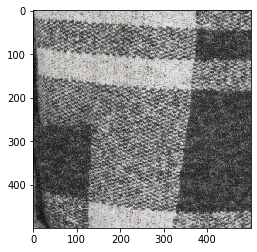

In [78]:
pics = '/home/ubuntu/efs/original-data/images-small-new/'
loc = 'damen/364074.png'
im = Image.open(pics + loc).convert('RGB')
imgplot = plt.imshow(im)
plt.show()

## Train - test dataset

In [80]:
X_train, X_val, y_train, y_val = train_test_split(df2['globus_id'], df2['features'], test_size=0.2, random_state=44)
print("Number of images for training: ", len(X_train))
print("Number of images for validation: ", len(X_val))

Number of images for training:  92213
Number of images for validation:  23054


In [100]:


# Set a root globally
# index the df for quick lookup speed

root = '/home/ubuntu/efs/original-data/images-small-new'

df_indexed = df.set_index(['globus_id'])

def pic_path(globus_id):
    """
    takes a globus id and returns a path to the 500x500 small .png
    """
    
    hier1 = df_indexed.loc[globus_id, 'hierarchy_1']
    hier2 = df_indexed.loc[globus_id, 'hierarchy_2']
    
    path = os.path.join(root, hier1, hier2, str(globus_id) +'.png')    
    
    return path

# os.path.join(root,)


In [83]:
def parse_function(path, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    # Read an image from a file
    image_string = tf.io.read_file(path)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [85]:
df2['globus_id'][0]

1751581

In [101]:
pic_path(df2['globus_id'][0])

'/home/ubuntu/efs/original-data/images-small-new/damenaccessoires/taschen/1751581.png'

## Label encoding

In [102]:
y_train

41804    [echtesleder, gummi, casual, sneakers, L2, run...
65215    [grafischemmuster, SE, schalsundtucher, gemust...
92473    [kurzarm, unifarben, leichtequalitaet, casual,...
14830    [organischemmuster, tops, SE, ohnearm, gemuste...
64605    [business, CO, kentkragen, mitbrusttasche, pop...
                               ...                        
53123    [echtesleder, blockabsatz, gummi, leder, bis3c...
49723    [unifarben, logomusterung, L18, goldfarbenedet...
25773    [kurzarm, unifarben, oxfordgewebestrukturierte...
69027    [unifarben, strick, PAN, PA, LI, kunstmischgew...
14100    [echtesleder, velours, gummi, zumschlupfen, bi...
Name: features, Length: 92213, dtype: object

In [91]:
from sklearn.preprocessing import MultiLabelBinarizer

In [92]:
# Fit the multi-label binarizer on the training set
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(y_train)

# Loop over all labels and show them
N_LABELS = len(labels)
for (i, label) in enumerate(labels):
    print("{}. {}".format(i, label))

Labels:
0. mitspitzendetails
1. abnehmbarerlaengenverstellbarerschulterriemen
2. businesshosen
3. zumschlupfen
4. ausdenim
5. offeneschuhspitze
6. 100baumwolle
7. gemustertodermitdruck
8. handtaschen
9. fliessend
10. gewebemitstrukturierteroptik
11. hakenverschluss
12. tshirts
13. gummi
14. pim-acryl
15. twillgewebeleichterschragverlaufenderstruktur
16. mitschoenerraffung
17. aufdruck
18. seitlichgeschlitzt
19. eingenahtekragenstabchen
20. zumschnuren
21. EL
22. chinos
23. langarm
24. Sneakertief
25. 100cashmere
26. manschettenmitknoepfen
27. karton
28. WO
29. LI
30. glitzerapplikationen
31. 100merinowolle
32. L2
33. flach
34. mitspitze
35. pim-edelstahl
36. naturfasermischgewebe
37. 100seide
38. inmidirocklange
39. riegelverschluss
40. blusen
41. MER
42. gewebemitflacheroptik
43. schalsundtucher
44. bugelfalten
45. halbschuhe
46. druckknopfe
47. schlupfblusen
48. kentkragen
49. Strukturstrick
50. WV
51. goldfarbenedetails
52. mitunterkleid
53. festergriff
54. blusentops
55. Warmequali

In [93]:
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

In [97]:
X_train.iloc[0]

273277

In [99]:
X_train

41804     273277
65215    1341290
92473    1476764
14830      70182
64605    1353585
          ...   
53123    1001416
49723     980152
25773    1952423
69027    1378102
14100    1855404
Name: globus_id, Length: 92213, dtype: int64

In [98]:
# Print example of images and their binary targets
for i in range(3):
    print(X_train.iloc[i], y_train_bin[i])

273277 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1]
1341290 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
1476764 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

## Number of products per product type

In [49]:
df2_filtered.groupby('descr')['prod_id'].nunique().sort_values(ascending=False)

descr
tshirt                  2947
strickpullover          2265
kleid                   1886
schal                   1472
umhangetasche           1463
handtasche              1450
socken                  1432
portemonnaieausleder    1211
hemdslimfit             1157
schultertasche          1042
schlupfbluse            1001
poloshirt                931
strickjacke              900
shopper                  791
stiefelette              782
sweatshirt               776
baumschmuck              739
stoffhose                679
hemdregularfit           658
top                      644
shorts                   643
rucksack                 626
shirt                    625
langarmshirt             608
hose                     602
chinohose                520
pyjama                   496
slip                     491
bluse                    471
daunenjacke              460
ledersneaker             455
cashmerepullover         445
sneaker                  409
hemdtailliert            400
Name: pr

In [54]:
df2_filtered['features'] = df2_filtered['features'].apply(literal_eval)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df2_filtered['features']

0         [goldfarbenedetails, reisverschluss, kunstlede...
1         [goldfarbenedetails, reisverschluss, kunstlede...
2         [goldfarbenedetails, reisverschluss, kunstlede...
3         [reisverschluss, kunstleder, unifarben, fachmi...
4         [reisverschluss, kunstleder, unifarben, fachmi...
5         [reisverschluss, kunstleder, unifarben, fachmi...
6         [taschenbodenmitschutzfuesschen, kunstleder, u...
7         [taschenbodenmitschutzfuesschen, kunstleder, u...
8         [handtaschen, abnehmbarerlaengenverstellbarers...
9         [handtaschen, abnehmbarerlaengenverstellbarers...
12        [reisverschluss, rucksacke, aufdruck, glitzera...
13        [reisverschluss, rucksacke, aufdruck, glitzera...
14        [reisverschluss, rucksacke, aufdruck, glitzera...
18        [goldfarbenedetails, rucksacke, kunstleder, un...
19        [goldfarbenedetails, rucksacke, kunstleder, un...
20        [goldfarbenedetails, rucksacke, kunstleder, un...
21        [aufdruck, fachmitreissverschl

In [83]:
len(df2_filtered['features'].iloc[0])

7

## T-SHIRT

In [86]:
tshirt=df2_filtered[df2_filtered['descr']=='tshirt']

In [87]:
tshirt.shape

(10584, 20)

In [90]:
tshirt.reset_index(drop=True, inplace=True)

In [91]:
list_of_features=np.concatenate(tshirt.features)

In [99]:
Counter(list_of_features).most_common()

[('kurzarm', 10514),
 ('rundhalsausschnitt', 9543),
 ('tshirts', 9356),
 ('leichtequalitaet', 8843),
 ('CO', 8591),
 ('ausjersey', 7899),
 ('100baumwolle', 6623),
 ('gemustertodermitdruck', 5954),
 ('weichergriff', 5782),
 ('unifarben', 4650),
 ('aufdruck', 3933),
 ('kunstmischgewebe', 1442),
 ('EL', 1386),
 ('CV', 1354),
 ('freizeit', 1089),
 ('PES', 913),
 ('streifenmuster', 854),
 ('vausschnitt', 737),
 ('naturfasermischgewebe', 733),
 ('applikationen', 693),
 ('grafischemmuster', 680),
 ('CMD', 660),
 ('mischgewebemitelasthan', 643),
 ('naturfasermitelasthan', 631),
 ('LI', 577),
 ('mitbrusttasche', 485),
 ('organischemmuster', 413),
 ('glitzerapplikationen', 400),
 ('100leinen', 358),
 ('chambraygewebeleichtstrukturierteroptik', 340),
 ('mittelschwerequalitaet', 336),
 ('PA', 304),
 ('druckknopfe', 260),
 ('popelinegewebeflacheroptik', 243),
 ('gewebemitflacheroptik', 199),
 ('mitaufdruckmusteramruecken', 197),
 ('raglanarmel', 194),
 ('strick', 183),
 ('mitschoenerraffung', 172),

In [97]:
len(Counter(list_of_features))

125

In [100]:
tshirt.groupby('descr')['prod_id'].nunique().sort_values(ascending=False)

descr
tshirt    2947
Name: prod_id, dtype: int64

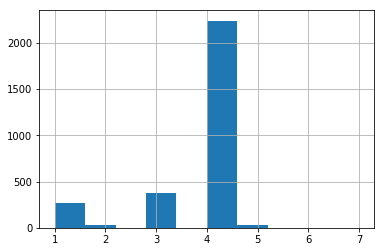

In [101]:
tshirt.groupby('prod_id').count().globus_id.hist()

In [103]:
tshirt['gender'].unique()

array(['damen', 'herren', 'kinder'], dtype=object)

## General data exploration 

In [57]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101551 entries, 0 to 277385
Data columns (total 19 columns):
unique_id         101551 non-null object
globus_id         101551 non-null int64
descr             101551 non-null object
name              101344 non-null object
gender            94828 non-null object
source_color      101260 non-null object
color             100898 non-null object
url               101551 non-null object
features          101551 non-null object
season            101551 non-null object
hierarchy_full    101551 non-null object
hierarchy_1       101551 non-null object
hierarchy_2       101551 non-null object
hierarchy_3       2102 non-null object
hierarchy_4       0 non-null float64
hierarchy_5       0 non-null float64
hierarchy_6       0 non-null float64
href              101551 non-null object
prod_id           101551 non-null object
dtypes: float64(3), int64(1), object(15)
memory usage: 15.5+ MB


In [58]:
df2_filtered.head()

,unique_id,globus_id,descr,name,gender,source_color,color,url,features,season,hierarchy_full,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5,hierarchy_6,href,prod_id
0,59462ba8-4712-409d-af94-002f65271f88,1751581,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[goldfarbenedetails, reisverschluss, kunstlede...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
1,afd9c2d9-2abc-4ed8-a8a0-715b3ab3c2cb,1751582,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[goldfarbenedetails, reisverschluss, kunstlede...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
2,7aaa3d6d-ffdf-4715-a0b7-92945c0e05a3,1751580,handtasche,GUESS,damen,beige,beige,https://apitest.censhare.globus.ch/image/17515...,"[goldfarbenedetails, reisverschluss, kunstlede...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536700801
3,b6e71841-4442-4c15-8e76-e8d64272888e,1726060,handtasche,GUESS,damen,schwarz,schwarz,https://apitest.censhare.globus.ch/image/17260...,"[reisverschluss, kunstleder, unifarben, fachmi...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536800739
4,cd040353-3c8e-47de-91b5-e16a5e26cd42,1726061,handtasche,GUESS,damen,schwarz,schwarz,https://apitest.censhare.globus.ch/image/17260...,"[reisverschluss, kunstleder, unifarben, fachmi...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259536800739


In [66]:
df2_filtered['hierarchy_1'].unique()

array(['damenaccessoires', 'damen', 'herren', 'kinder', 'lingerie',
       'heim-haushalt'], dtype=object)

In [61]:
df2_filtered['hierarchy_2'].unique()

array(['taschen', 'pullover-strick', 'blusen-tuniken', 'shorts-bermudas',
       'top-shirts-sweats', 'kleider', 'hosen', 'shirts-tops-sweats',
       'oberteile', 'kleider-sets', 'unterteile', 'hemden', 'tagwasche',
       'strumpfmode', 'schals', 'portemonnaie', 'jacken',
       'wasche-pyjamas', 'schuhe', 'taschen-accessoire', 'weihnachten',
       'socken', 'reisegepack', 'wasche', 'loungewearyoga', 'nachtwasche',
       'wohnen'], dtype=object)

In [62]:
df2_filtered['hierarchy_3'].unique()

array([nan, 'baumschmuck', 'taschen', 'koffer-taschen',
       'weihnachtsdekoration'], dtype=object)

In [63]:
df2_filtered['hierarchy_4'].unique()

array([nan])

In [64]:
df2_filtered['hierarchy_5'].unique()

array([nan])

In [65]:
df2_filtered['hierarchy_6'].unique()

array([nan])

In [69]:
df2_filtered['color'].unique()

array(['beige', 'schwarz', 'blau', 'grün', 'cognac', 'anthrazit', 'braun',
       'sun', 'dunkelrot', 'kupfer', 'grau', 'offwhite', 'hellblau',
       'weiss', 'flieder', 'berry', 'gelb', 'senf', 'tanne', 'pink',
       'olive', 'türkis', 'ecru', 'rosa', 'rot', 'dunkelblau', 'bordeaux',
       'altrosa', 'indigo', 'hellrosa', 'grau melange', 'khaki', 'navy',
       'korall', 'aubergine', 'blau kariert', 'rot kariert', 'hellgrau',
       'schwarz kariert', 'braun kariert', 'petrol', 'kaffee', 'lila',
       'marine', 'silberfarben', 'hellgrün', 'camel', 'aqua', 'nachtblau',
       'dunkelgrau', 'fuchsia', 'royal', 'goldfarben', 'dunkelgrün',
       'perle', 'champagne', 'schwarz gestreift', 'nude',
       'violett/klein gemustert', 'blau/klein gemustert',
       'orange/klein gemustert', 'weiss/klein gemustert', 'blaugrau',
       'azurblau', 'caramel', 'dunkelbraun', 'viola', 'hellbraun',
       'roségold', nan, 'cool beige', 'sahara', 'carminrot', 'ciel',
       'stein', 'mint', 'pude

In [70]:
df2_filtered['color'].nunique()

253

In [82]:
df2_filtered['color'].isna().sum()

653

In [73]:
df2_filtered['diff_color'] = np.where(df2_filtered['source_color'] == df2_filtered['color'], 'same', 'diff')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
df2_filtered['diff_color'].value_counts()

diff    51170
same    50381
Name: diff_color, dtype: int64

In [76]:
df2_filtered[df2_filtered['diff_color']=='diff'].head()

,unique_id,globus_id,descr,name,gender,source_color,color,url,features,season,hierarchy_full,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5,hierarchy_6,href,prod_id,diff_color
28,1678fb5f-83e5-4557-a275-c99dfa81bc1a,1789857,shopper,GUESS,damen,braun,cognac,https://apitest.censhare.globus.ch/image/17898...,"[goldfarbenedetails, druckknopfe, makeuptasche...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259537600816,diff
29,fb16e302-7108-4be4-8621-20e3dcf59ae8,1789856,shopper,GUESS,damen,braun,cognac,https://apitest.censhare.globus.ch/image/17898...,"[goldfarbenedetails, druckknopfe, makeuptasche...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259537600816,diff
39,a569e842-557d-4025-acf6-04f7a1fb615a,1790166,shopper,GUESS,damen,grau,anthrazit,https://apitest.censhare.globus.ch/image/17901...,"[handtaschen, kunstleder, gemustertodermitdruc...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259537900735,diff
40,e8245662-976b-46f5-9ce1-676b88115011,1790165,shopper,GUESS,damen,grau,anthrazit,https://apitest.censhare.globus.ch/image/17901...,"[handtaschen, kunstleder, gemustertodermitdruc...",W,globus:pim.category.damenaccessoires.taschen,damenaccessoires,taschen,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259537900735,diff
97,e96d58bc-82b1-4ac8-84f4-e646d5e7f6de,1751728,strickpullover,BOSS,damen,gelb,sun,https://apitest.censhare.globus.ch/image/17517...,"[weichergriff, CO, rundhalsausschnitt, unifarb...",N,globus:pim.category.damen.pullover-strick,damen,pullover-strick,NaN,NaN,NaN,NaN,https://apitest.censhare.globus.ch/products/15...,1259539100122,diff


In [77]:
df2_filtered['source_color'].nunique()

15

In [78]:
df2_filtered['source_color'].unique()

array(['beige', 'schwarz', 'blau', 'grün', 'braun', 'grau', 'gelb', 'rot',
       'weiss', 'violett', 'pink', 'rosa', 'orange', 'silber', 'gold',
       nan], dtype=object)

In [79]:
df2_filtered['source_color'].value_counts()

blau       24847
schwarz    17356
weiss      14538
grau        9686
rot         7122
grün        5682
braun       5594
beige       3896
rosa        3584
pink        2421
orange      1734
gelb        1656
violett     1431
silber      1156
gold         557
Name: source_color, dtype: int64

In [81]:
df2_filtered['source_color'].isna().sum()

291

# Feature

In [3]:

df_new = pd.read_csv('../../globus/1_cleaning/metadata_cleaned.csv')

In [4]:
df_new.shape

(33354, 8)

In [5]:
df_new.head()

,Unnamed: 0,globus_id,hierarchy,features,color,image_url,img_class,image_path
0,35,26653,damenaccessoires/taschen/umhangetasche/26653,"['verschlussartfashion-reisverschluss', 'navmu...",navy,https://apitest.censhare.globus.ch/image/26653...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
1,36,26663,damenaccessoires/taschen/umhangetasche/26663,"['verschlussartfashion-reisverschluss', 'navmu...",schwarz,https://apitest.censhare.globus.ch/image/26663...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
2,37,26665,damenaccessoires/taschen/umhangetasche/26665,"['verschlussartfashion-reisverschluss', 'navmu...",braun,https://apitest.censhare.globus.ch/image/26665...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
3,38,26655,damenaccessoires/taschen/umhangetasche/26655,"['verschlussartfashion-reisverschluss', 'navmu...",grün,https://apitest.censhare.globus.ch/image/26655...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
4,39,38482,damenaccessoires/taschen/umhangetasche/38482,"['verschlussartfashion-reisverschluss', 'navmu...",hellgrün,https://apitest.censhare.globus.ch/image/38482...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...


In [14]:
text='verschlussartfashion-reisverschluss'

In [16]:
text.split('-')[0]

'verschlussartfashion'

In [ ]:
df_new['feature_groups']=df_new['features'].apply(lambda x)

In [ ]:
for index, row in df_new.iterrows():
    row['feature_groups']=row['features']

In [27]:
ls = ['one-two', 'one-three']
tree = {}

for item in ls:
    t = tree
    for part in item.split('-'):
        t = t.setdefault(part, {})

one
two
one
three


In [29]:
features = ['this-that', 'this-other', 'third - that']
levels = dict()
levels = {el.split('-')[0]:[] for el in features}
for k,v in zip([el.split('-')[0] for el in features],[el.split('-')[1] for el in features]):
    levels[k] += [v]
levels

{'this': ['that', 'other'], 'third ': [' that']}

In [30]:
df_new['features'] = df_new['features'].apply(literal_eval)
list_of_features=np.concatenate(df_new.features)

In [32]:
len(list_of_features)

430882

In [97]:
features=set(list_of_features)

In [98]:
len(features)

112

In [104]:
features

['slimfit',
 'trocknen-1',
 'besonderheiten-abnehmbarerlaengenverstellbarerschulterriemen',
 'sommer',
 'falten-bugelfalten',
 'buegeln-1',
 'waschen-2',
 'qualitaet-echtesleder',
 'besonderheiten-verstellbarerschulterriemen',
 'musterung-grafischemmuster',
 'saison-leichtequalitaet',
 'taschen-schragertascheneingriff',
 'armellange-kurzarm',
 'griff-fliessend',
 'material-L1',
 'kragenstabchen-ohnekragenstabchen',
 'musterung-unifarben',
 'armellange-langarm',
 'rahmengenaht-False',
 'ausschnittkragenform-rundhalsausschnitt',
 'qualitaet-kunstmischgewebe',
 'verschlussartfashion-magnetverschluss',
 'qualitaet-100baumwolle',
 'armellange-ohnearm',
 'waschen-4',
 'innenausstattung-fachmitreissverschluss',
 'webart-gewebemitflacheroptik',
 'webart-Strukturstrick',
 'hemdenkragenform-kentkragen',
 'material-WO',
 'qualitaet-mischgewebemitelasthan',
 'trocknen-0',
 'knopfleiste-mitaufgesetzterknopfleiste',
 'material-CAC',
 'waschen-1',
 'ausschnittkragenform-vausschnitt',
 'armellange-34a

In [105]:
features=list(features)

In [106]:
features

['slimfit',
 'trocknen-1',
 'besonderheiten-abnehmbarerlaengenverstellbarerschulterriemen',
 'sommer',
 'falten-bugelfalten',
 'buegeln-1',
 'waschen-2',
 'qualitaet-echtesleder',
 'besonderheiten-verstellbarerschulterriemen',
 'musterung-grafischemmuster',
 'saison-leichtequalitaet',
 'taschen-schragertascheneingriff',
 'armellange-kurzarm',
 'griff-fliessend',
 'material-L1',
 'kragenstabchen-ohnekragenstabchen',
 'musterung-unifarben',
 'armellange-langarm',
 'rahmengenaht-False',
 'ausschnittkragenform-rundhalsausschnitt',
 'qualitaet-kunstmischgewebe',
 'verschlussartfashion-magnetverschluss',
 'qualitaet-100baumwolle',
 'armellange-ohnearm',
 'waschen-4',
 'innenausstattung-fachmitreissverschluss',
 'webart-gewebemitflacheroptik',
 'webart-Strukturstrick',
 'hemdenkragenform-kentkragen',
 'material-WO',
 'qualitaet-mischgewebemitelasthan',
 'trocknen-0',
 'knopfleiste-mitaufgesetzterknopfleiste',
 'material-CAC',
 'waschen-1',
 'ausschnittkragenform-vausschnitt',
 'armellange-34a

In [114]:
#features.remove('winter')
#features.remove('sommer')
#features.remove('slimfit')
features.remove('beidesaison')

In [115]:
features

['trocknen-1',
 'besonderheiten-abnehmbarerlaengenverstellbarerschulterriemen',
 'falten-bugelfalten',
 'buegeln-1',
 'waschen-2',
 'qualitaet-echtesleder',
 'besonderheiten-verstellbarerschulterriemen',
 'musterung-grafischemmuster',
 'saison-leichtequalitaet',
 'taschen-schragertascheneingriff',
 'armellange-kurzarm',
 'griff-fliessend',
 'material-L1',
 'kragenstabchen-ohnekragenstabchen',
 'musterung-unifarben',
 'armellange-langarm',
 'rahmengenaht-False',
 'ausschnittkragenform-rundhalsausschnitt',
 'qualitaet-kunstmischgewebe',
 'verschlussartfashion-magnetverschluss',
 'qualitaet-100baumwolle',
 'armellange-ohnearm',
 'waschen-4',
 'innenausstattung-fachmitreissverschluss',
 'webart-gewebemitflacheroptik',
 'webart-Strukturstrick',
 'hemdenkragenform-kentkragen',
 'material-WO',
 'qualitaet-mischgewebemitelasthan',
 'trocknen-0',
 'knopfleiste-mitaufgesetzterknopfleiste',
 'material-CAC',
 'waschen-1',
 'ausschnittkragenform-vausschnitt',
 'armellange-34armlange',
 'decksohle-l

In [126]:
levels = dict()



levels = {el.split('-')[0]:[] for el in features}
for k,v in zip([el.split('-')[0] for el in features],[el.split('-')[1] for el in features]):
    levels[k] += [v]
levels

{'trocknen': ['1', '0'],
 'besonderheiten': ['abnehmbarerlaengenverstellbarerschulterriemen',
  'verstellbarerschulterriemen',
  'fransen',
  'anhaenger',
  'goldfarbenedetails'],
 'falten': ['bugelfalten'],
 'buegeln': ['1', '2', '0'],
 'waschen': ['2', '4', '1', 'F', '0'],
 'qualitaet': ['echtesleder',
  'kunstmischgewebe',
  '100baumwolle',
  'mischgewebemitelasthan',
  'naturfasermitelasthan',
  'naturfasermischgewebe'],
 'musterung': ['grafischemmuster',
  'unifarben',
  'streifenmuster',
  'organischemmuster',
  'aufdruck'],
 'saison': ['leichtequalitaet', 'mittelschwerequalitaet', 'Warmequalitaet'],
 'taschen': ['schragertascheneingriff', 'leistentaschen'],
 'armellange': ['kurzarm', 'langarm', 'ohnearm', '34armlange'],
 'griff': ['fliessend', 'weichergriff', 'festergriff'],
 'material': ['L1', 'WO', 'CAC', 'L18', 'SE', 'EL', 'CO', 'CV', 'PES', 'PA'],
 'kragenstabchen': ['ohnekragenstabchen'],
 'rahmengenaht': ['False'],
 'ausschnittkragenform': ['rundhalsausschnitt',
  'vaussch

In [128]:
levels.keys()

dict_keys(['trocknen', 'besonderheiten', 'falten', 'buegeln', 'waschen', 'qualitaet', 'musterung', 'saison', 'taschen', 'armellange', 'griff', 'material', 'kragenstabchen', 'rahmengenaht', 'ausschnittkragenform', 'verschlussartfashion', 'innenausstattung', 'webart', 'hemdenkragenform', 'knopfleiste', 'decksohle', 'verschlussschuhe', 'passform', 'chemReinigen', 'navdamentaschen', 'navmusterung', 'futtermaterial', 'laufsohle', 'bundhohe', 'rocklange', 'navshirtstopssweats', 'armabschluss', 'navkleider', 'hosenbeinform', 'formschuhe', 'navblusentuniken', 'navabsatzhohe', 'anlass', 'bleichen', 'navdamenaccessoires', 'absatzart', 'hosenlange', 'navpulloverstrick'])

In [129]:
df_new.head()

,Unnamed: 0,globus_id,hierarchy,features,color,image_url,img_class,image_path
0,35,26653,damenaccessoires/taschen/umhangetasche/26653,"[verschlussartfashion-reisverschluss, navmuste...",navy,https://apitest.censhare.globus.ch/image/26653...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
1,36,26663,damenaccessoires/taschen/umhangetasche/26663,"[verschlussartfashion-reisverschluss, navmuste...",schwarz,https://apitest.censhare.globus.ch/image/26663...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
2,37,26665,damenaccessoires/taschen/umhangetasche/26665,"[verschlussartfashion-reisverschluss, navmuste...",braun,https://apitest.censhare.globus.ch/image/26665...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
3,38,26655,damenaccessoires/taschen/umhangetasche/26655,"[verschlussartfashion-reisverschluss, navmuste...",grün,https://apitest.censhare.globus.ch/image/26655...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...
4,39,38482,damenaccessoires/taschen/umhangetasche/38482,"[verschlussartfashion-reisverschluss, navmuste...",hellgrün,https://apitest.censhare.globus.ch/image/38482...,damenaccessoires_taschen_umhangetasche,/home/ubuntu/efs/original-data/images-small-ne...


In [130]:
len(levels.keys())

43

In [142]:
pd.set_option('display.max_colwidth', -1)
df_new[df_new['globus_id']==36001]['features']

8    [chemReinigen-4, buegeln-2, armellange-langarm, bleichen-0, winter, anlass-casual, trocknen-1, navmusterung-gemustertodermitdruck, passform-001, material-CO, qualitaet-100baumwolle]
Name: features, dtype: object